In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
print ("The libraries have been loaded.")

The libraries have been loaded.


In [2]:
data = pd.read_csv(f'C:\\Users\\Leonardo\\Desktop\\Projetos Python\\Pesquisa\\data\\boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#Setting apart the variables

x= data[['LSTAT']]
y= data[['MEDV']]
x_train_sm = sm.add_constant(x)

#Doing the Linear Regression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 101)
lm= sm.OLS(y,x_train_sm).fit()
y_pred = lm.predict(x_train_sm)
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           5.08e-88
Time:                        14:34:50   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [4]:
print(lm.conf_int())

               0          1
const  33.448457  35.659225
LSTAT  -1.026148  -0.873951


In [5]:
lr = LinearRegression()
lr = lr.fit(x,y)
lr.predict([[5],[10],[15]])

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[29.80359411],
       [25.05334734],
       [20.30310057]])

Linear Regression and Residuals Plot
The residual plot get us to identify something of a pattern, witch makes us know that the best fitting regression might not be linear 


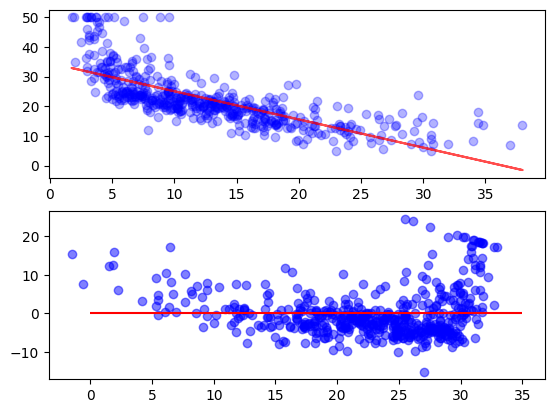

In [6]:
print('Linear Regression and Residuals Plot')
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.scatter(x,y, color= 'blue', marker = 'o', alpha = 0.3)
ax1.plot(x,y_pred, color='red', alpha = 0.7)

resid = lm.resid

ax2.scatter(y_pred,resid, alpha = 0.5, color = 'blue')
ax2.hlines(y=0, xmin= 0, xmax=35,color='red', alpha = 1)
print('The residual plot get us to identify something of a pattern, witch makes us know that the best fitting regression might not be linear ')

In [7]:
x3 = data.drop('MEDV', axis = 1)
y = data['MEDV']
x3_train_sm = sm.add_constant(x3)
lm3 = sm.OLS(y,x3_train_sm).fit()
VIF = 1/(1-(lm3.rsquared)**2)
print(f'{lm3.summary()}\n')
print(f'R squared: {round(lm3.rsquared, 3)}\nRSE: {round(np.sqrt(lm3.mse_resid), 3)}\nVIF: {VIF}')
#Pq no R o VIF tem vários valores, sendo que o variance inflation factor é um valor que indica multicolinearidade dentro de uma análise só?

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          6.72e-135
Time:                        14:34:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [8]:
#Multiple Linear Regression

x2 = pd.DataFrame({'LSTAT': data.LSTAT, 'Age': data.AGE})
y = data['MEDV']
x2_train_sm = sm.add_constant(x2)
lm2 = sm.OLS(y,x2_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.98e-88
Time:                        14:34:51   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [9]:
x3 = data.drop('MEDV', axis = 1)
y = data['MEDV']
x3_train_sm = sm.add_constant(x3)
lm3 = sm.OLS(y,x3_train_sm).fit()
VIF = 1/(1-(lm3.rsquared)**2)
print(f'{lm3.summary()}\n')
print(f'R squared: {round(lm3.rsquared, 3)}\nRSE: {round(np.sqrt(lm3.mse_resid), 3)}\nVIF: {VIF}')
#Pq no R o VIF tem vários valores, sendo que o variance inflation factor é um valor que indica multicolinearidade dentro de uma análise só?

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          6.72e-135
Time:                        14:34:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [10]:
data.columns
x4 = pd.DataFrame(data.drop({'MEDV', 'AGE'}, axis = 1))
y = data['MEDV']
x4_train_sm = sm.add_constant(x4)
lm3 = sm.OLS(y,x4_train_sm).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          6.08e-136
Time:                        14:34:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4369      5.080      7.172      0.0

In [11]:
x5 = data[['LSTAT', 'AGE']]
X5mult= data['AGE']*data['LSTAT']
x5['AGE*LSTAT']= X5mult
y= data['MEDV']
x5_train_sm = sm.add_constant(x5)
lm4 = sm.OLS(y,x5_train_sm).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.86e-88
Time:                        14:34:51   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.0

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_10636\3959526707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x5['AGE*LSTAT']= X5mult


In [12]:
x6 = pd.DataFrame()
x6['LSTAT'] = data['LSTAT']
x6['LSTAT**2'] = data['LSTAT']**2
print(x6.head())
y = data['MEDV']
x6_train_sm = sm.add_constant(x6)
lm5 = sm.OLS(y,x6_train_sm).fit()
print(lm5.summary())

   LSTAT  LSTAT**2
0   4.98   24.8004
1   9.14   83.5396
2   4.03   16.2409
3   2.94    8.6436
4   5.33   28.4089
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.56e-112
Time:                        14:34:51   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

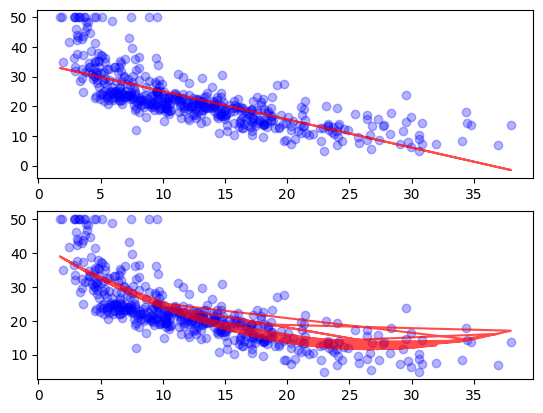

In [13]:
y_pred = lm.predict(x_train_sm)
fig, (ax1, ax2) = plt.subplots(2,1)
y_pred1= lm5.predict(x6_train_sm)
ax1.scatter(x,y, color= 'blue', marker = 'o', alpha = 0.3)
ax1.plot(x,y_pred, color='red', alpha = 0.7)
ax2.scatter(x,y, color= 'blue', marker = 'o', alpha = 0.3)
ax2.plot(x,y_pred1, color='red', alpha = 0.7)
#não consegui plotar a curva como uma curva

In [14]:
x7=pd.DataFrame()
x7['LSTAT**5'] = data['LSTAT']**5
x7['LSTAT'] = data['LSTAT']
y = data['MEDV']
x7_train_sm = sm.add_constant(x7)
lm6 = sm.OLS(y,x7_train_sm).fit()
print(lm6.summary())
#não consegui achar os valores de r² usando o poly() sendo crescentes, como comentado no livro

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     379.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          3.02e-101
Time:                        14:34:52   Log-Likelihood:                -1607.4
No. Observations:                 506   AIC:                             3221.
Df Residuals:                     503   BIC:                             3233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4601      0.627     59.706      0.0

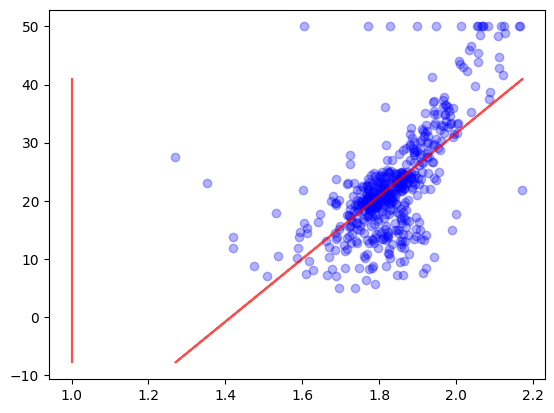

In [15]:
xrm= np.log(data['RM'])
y = data['MEDV']
xrm_train_sm = sm.add_constant(xrm)
lm7 = sm.OLS(y,xrm_train_sm).fit()
y_predrm = lm7.predict(xrm_train_sm)
#print(lm7.summary())
#fig = plt.figure()

plt.scatter(xrm,y, color= 'blue', marker = 'o', alpha = 0.3)
plt.plot(xrm_train_sm,y_predrm, color='red', alpha = 0.7)

In [16]:
data2= pd.read_csv(f'C:\\Users\\Leonardo\\Desktop\\Projetos Python\\Pesquisa\\data\\Carseats.csv', index_col=[0])
data2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Unnamed: 0,,,,,,,,,,,
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [18]:
Xcars = data2.drop(['Sales'],axis= 1)
Xcars['Income:Advertising'] = data2['Income']*data2['Advertising']
Xcars['Price:Age'] = data2['Price']*data2['Age']
y = data2['Sales']
Xcars['Urban'] = Xcars['Urban'].replace('Yes', 1)
Xcars['Urban'] = Xcars['Urban'].replace('No', 0)
Xcars['US'] = Xcars['US'].replace('Yes', 1)
Xcars['US'] = Xcars['US'].replace('No', 0)
Xcars['ShelveLoc']= Xcars['ShelveLoc'].replace('Good', 1)
Xcars['ShelveLoc']= Xcars['ShelveLoc'].replace('Bad', -1)
Xcars['ShelveLoc']= Xcars['ShelveLoc'].replace('Medium', 0)
Xcars


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Income:Advertising,Price:Age
Unnamed: 0,,,,,,,,,,,,
1,138,73,11,276,120,-1,42,17,1,1,803,5040
2,111,48,16,260,83,1,65,10,1,1,768,5395
3,113,35,10,269,80,0,59,12,1,1,350,4720
4,117,100,4,466,97,0,55,14,1,1,400,5335
5,141,64,3,340,128,-1,38,13,1,0,192,4864
...,...,...,...,...,...,...,...,...,...,...,...,...
396,138,108,17,203,128,1,33,14,1,1,1836,4224
397,139,23,3,37,120,0,55,11,0,1,69,6600
398,162,26,12,368,159,0,40,18,1,1,312,6360


In [19]:
Xcars_train_sm = sm.add_constant(Xcars)
lm8 = sm.OLS(y, Xcars_train_sm).fit()

print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     214.6
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.15e-162
Time:                        14:35:15   Log-Likelihood:                -575.33
No. Observations:                 400   AIC:                             1177.
Df Residuals:                     387   BIC:                             1229.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.5650      1